#<center> Engineering Economy Epic Cheat Sheet</center>
---

In [1]:
!cp drive/MyDrive/Economy/A_F.py .
!cp drive/MyDrive/Economy/A_P.py .
!cp drive/MyDrive/Economy/G.py .
!cp drive/MyDrive/Economy/P_F.py .
!cp drive/MyDrive/Economy/ie.py .
!pip3 install -q matplotlib==3.4.2

```!pip3 install -q matplotlib==3.4.2``` ***might give error, in order to fix it, restart runtime and run it again.***

Import core files to your drive, and if needed change the previous cell.

In [2]:
from A_F import *
from A_P import *
from G import *
from P_F import *
from ie import *

import sympy
from sympy import *
from sympy.solvers import solve
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from IPython.display import display, Latex
import pandas as pd
import numpy as np


Here you can see each core function, remember that i should be $0 <= i <= 1$.<br>
- Functions in **A_F.py**:
  >- A_F(F, i, n): 
  $F(A/F, i, n)$
  <br>
  >- F_A(A, i, n): 
  $A(F/A, i, n)$
  <br>
  >- F_Aj(A1, i, j, n):
  $A_1(F/A, i, j, n)$

- Functions in **A_P.py**:
  >- A_P(P, i, n, inf=False):
  $P(A/P, i, n)$
  <br>
  >- P_A(A, i, n, inf=False): 
  $A(P/A, i, n)$
  <br>
  >- P_Aj(A1, i, j, n):
  $A_1(P/A, i, j, n)$
  
- Functions in **G.py**:
  >- P_G(G, i, n): 
  $G(P/G, i, n)$
  <br>
  >- A_G(G, i, n): 
  $G(P/G, i, n)$
 
- Functions in **ie.py**:
  >- ie(r, t): $(1 + \dfrac{r}{t})^t - 1$

- Functions in **P_F.py**:
  >- P_F(F, i, n): $F(P/F, i, n)$
  >- F_P(P, i, n): $P(F/P, i, n)$

You can try them out in the next cell.


In [3]:
print(P_G(250, 0.24, 30) + P_A(1000, 0.24, 30))
print(F_P(8444.31, 0.24, 30))
print(A_F(5360616.30, 0.02, 240))

8444.317323931356
5360616.307938108
933.1839701888509


In [4]:
def GeoMean(rs):
  p = 1
  for r in rs:
    p *= (1 + r)
  r = p ** (1/len(rs)) - 1
  return r

To calcualte Geometric mean, use GeoMean(rs) function: <br>
**GeoMean(rs = [r1, r2, r3 ..., rn])** = $r_g = \sqrt[n]{(1 + r_1) (1 + r_2) (1 + r_3) ... (1 + r_n)}$<br>
Here give it a try:

In [5]:
print(GeoMean([1]))
print(GeoMean([1, 1]))
print(GeoMean([2, 1]))

1.0
1.0
1.4494897427831779


In [6]:
def SolveRoR(eq, i):
  shouldBreak = False
  start = 0.01
  while shouldBreak == False:
    if start > 1:
      break
    try:
      print("trying ", start)
      i = nsolve(eq, i, (start, 0.99))
      shouldBreak = True
    except:
      shouldBreak = False
      start += 0.01
  return i

You can use SolveRoR(eq, i) to calculate i, instead of looking it up in the i's tables of the book.
Let's find the *i* for the corresponding formula: <br>
$30000 = 8000(P/A, i, 5) + 7500(P/F, i, 5)$ 

In [7]:
i = Symbol("i")
i = SolveRoR(-30000 + P_A(8000.0, i, 5) + P_F(7500, i, 5), i)
print(-30000 + P_A(8000.0, i, 5) + P_F(7500, i, 5),"\ni =", i)

trying  0.01
7.73070496506989e-12 
i = 0.156949623919420


### Ok, so far with few lines of code you're good to go from chapter 1 till the end of chapter 10.<br>

#<center>Chapter 6 Rate of Return</center>

You can calculate the most economical project based on RoR in 2 methods:
1. Plot, use RoRDraw(PWs)
2. Compute, use RoRCompute(PWs, n). **This is my preferred method**.

In [8]:
def RoRDraw(PWs):
  PWs = dict(sorted(PWs.items(), key=lambda x: x[1][0]))
  # print(PWs)
  PWBs = [PW[1] for PW in PWs.values()]
  PWCs = [PW[0] for PW in PWs.values()]
  labels = PWs.keys()
  # print(labels)
  fig, ax = plt.subplots(figsize=(13,13))
  ax.scatter(PWCs, PWBs)

  m =  1
  ax.axline([0, 0], slope=m, color='pink')
  for i, label in enumerate(labels):
    ax.annotate(label, (PWCs[i], PWBs[i]))
  for i in range(1, len(labels)):
    ax.plot(PWCs[i-1:i+1], PWBs[i-1:i+1])
    ax.annotate(((PWBs[i] - PWBs[i-1]) / (PWCs[i] - PWCs[i-1])) \
               ,((PWCs[i-1] + PWCs[i]) / 2, (PWBs[i-1] + PWBs[i]) / 2))

In [9]:
def RoRCompute(PWs, n):
  PWs = dict(sorted(PWs.items(), key=lambda x: x[1][0]))
  # print(PWs)
  PWBs = [PW[1] for PW in PWs.values()]
  PWCs = [PW[0] for PW in PWs.values()]
  labels = list(PWs.keys())
  # print(labels)
  table = {'index': [], 'RoR': []}
  for j in range(1, len(labels)):
    table['index'].append(labels[j - 1] + '-' + labels[j])
    i = Symbol("i")
    P = PWCs[j] - PWCs[j-1]
    A = PWBs[j] - PWBs[j-1]
    i = SolveRoR((P / A) - P_A(1, i, n), i)
    table['RoR'].append(i)
  display(pd.DataFrame(table))

Let's check some examples:

trying  0.01


,index,RoR
0,A-B,0.382541812309857


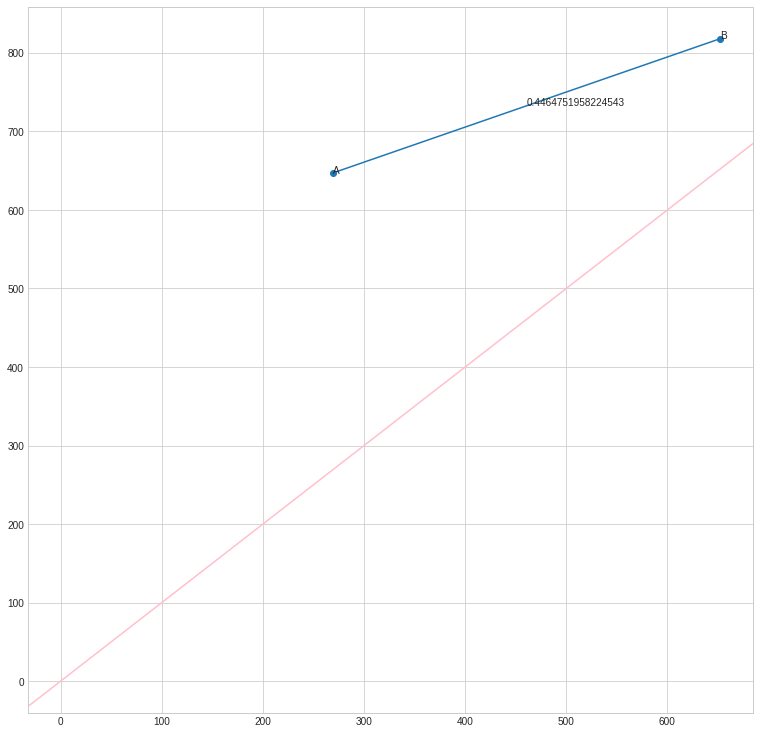

In [10]:
PWs = {'A': (269, 647), 'B': (652, 818)} # (PWc, PWb)

RoRDraw(PWs)
RoRCompute(PWs, 6) # n is 6 here, it's set based on the question

A is the most economical project.

trying  0.01
trying  0.01


,index,RoR
0,A-B,1.31299993164783
1,B-C,0.699982773080226


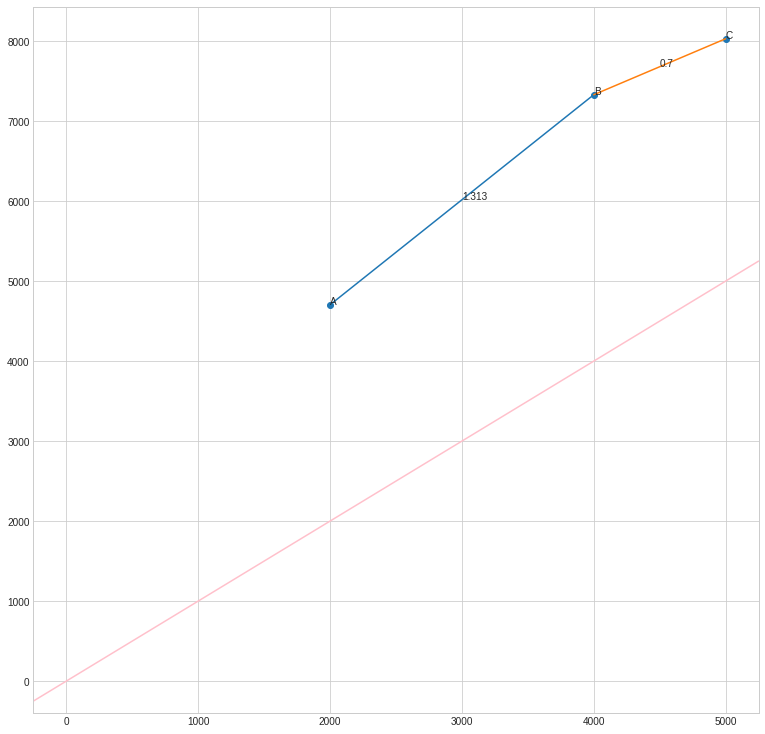

In [11]:
PWs = {'A': (2000, 4703), 'B': (4000, 7329), 'C': (5000, 8029)} # (PWc, PWb)

RoRDraw(PWs)
RoRCompute(PWs, 20) # n is 20 here, it's set based on the question

B is the most economical project.

trying  0.01
trying  0.01
trying  0.01
trying  0.01
trying  0.02
trying  0.03


,index,RoR
0,C-A,2.92999999999621
1,A-B,1.14499973068494
2,B-D,0.609955428959080
3,D-E,0.0496431890836336


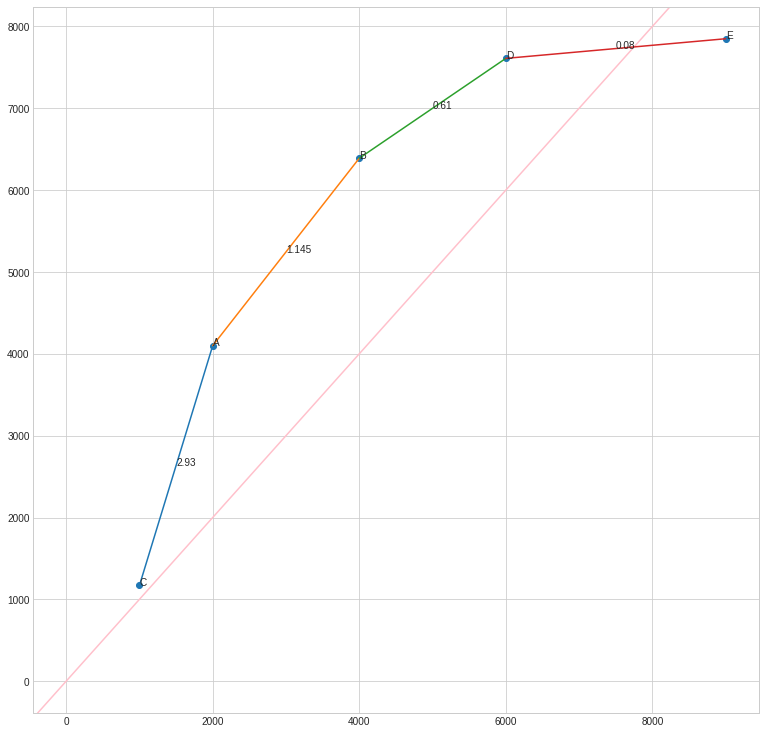

In [12]:
PWs = {'A': (2000, 4100), 'B': (4000, 6390), 'C': (1000, 1170), 'D': (6000, 7610), 'E': (9000, 7850)} # (PWc, PWb)

RoRDraw(PWs)
RoRCompute(PWs, 20) # n is 20 here, it's set based on the question

B is the most economical project.

###Rest of the codes are for chapter 11 to chapter 14.


#<center>Chapter 11 Decline</center>
---

In the following cells, you can see each decline type implemented in a class, but all of them are drived from DeclineBase.

In [13]:
class DeclineBase:
  def __init__(self, P, n):
    self.P = P
    self.n = n

  def GetD(self, m):
    pass
  def BV(self, m):
    pass
  def GetTable(self):
    table = {"m": [], "Dm": [], "BVm": []}
    for i in range(self.n + 1):
      table["m"].append(i)
      table["Dm"].append(self.GetD(i))
      table["BVm"].append(self.BV(i))
    df = pd.DataFrame(table)
    display(df)
  def GetDs(self):
    return [self.GetD(i) for i in range(1, self.n + 1)]
  def GetPWD(self, i):
    return sum([P_F(self.GetD(m), i, m) for m in range(1, self.n + 1)])
  def GetEUA(self, i):
    return A_P(self.GetPWD(i), i, self.n)
  def GetTaxSaving(self, TR, i):
    return TR * self.GetPWD(i)

In [14]:
class DeclineNull(DeclineBase):
  def __init__(self, P, n, SV):
    super().__init__(P, n)
    self.SV = SV

    sP = Symbol('P')
    sSV = Symbol('SV')
    sn = Symbol('n')
    sm = Symbol('m')
    sD = Symbol('D')
    self.DFormula = eval("(sP - sSV) / sn")
    self.BVFormula = eval("sP - sm*sD")
    
  def GetD(self, m):
    return 0

  def BV(self, m):
    D = self.GetD(m)
    BV = self.P - m * D 
    display(Latex(f'$BV_{m}={sympy.latex(self.BVFormula)} = {BV}$'))
    return BV

  def GetTaxSaving(self, TR, i):
    return  0

In [15]:
class DeclineLinear(DeclineBase):
  def __init__(self, P, n, SV):
    super().__init__(P, n)
    self.SV = SV

    sP = Symbol('P')
    sSV = Symbol('SV')
    sn = Symbol('n')
    sm = Symbol('m')
    sD = Symbol('D')
    self.DFormula = eval("(sP - sSV) / sn")
    self.BVFormula = eval("sP - sm*sD")
    
  def GetD(self, m):
    D = (self.P - self.SV) / self.n
    display(Latex(f'${"D ="}{sympy.latex(self.DFormula)} = {D}$'))
    return D

  def BV(self, m):
    D = self.GetD(m)
    BV = self.P - m * D 
    display(Latex(f'$BV_{m}={sympy.latex(self.BVFormula)} = {BV}$'))
    return BV

  def GetTaxSaving(self, TR, i):
    r = ((TR * (self.P - self.SV)) / self.n) * P_A(1, i, self.n)
    print(f"method1: {super().GetTaxSaving(TR, i)}", f"method2: {r}")
    return  r

In [16]:
class DeclineSYD(DeclineBase):
  def __init__(self, P, n, SV):
    super().__init__(P, n)
    self.SV = SV

    sP = Symbol('P')
    sSV = Symbol('SV')
    sn = Symbol('n')
    sm = Symbol('m')
    sD = Symbol('D')
    SYD = sympify("(n * (n + 1)) / 2")
    self.SYDFormula = eval("SYD")
    self.DFormula = eval("((sn - sm + 1) / (SYD)) * (sP - sSV)")
    self.BVFormula = eval("sP - ((sm*(sn - sm/2 + 0.5)/SYD) * (sP - sSV))")

    self.SYD = (self.n * (self.n + 1)) / 2 
    display(Latex(f'$SYD = {sympy.latex(self.SYDFormula)} = {self.SYD}$'))
  def GetSYD(self):
    return self.SYD 

  def GetD(self, m):
    SYD = self.GetSYD()
    Dm = ((self.n - m + 1) / SYD) * (self.P - self.SV)
    display(Latex(f'$D_{m} = {sympy.latex(self.DFormula)} = {Dm}$'))
    return  Dm

  def BV(self, m):
    SYD = self.GetSYD()
    BVm = self.P - (((m * (self.n - (m / 2) + 0.5)) / SYD) * (self.P - self.SV))
    display(Latex(f'$BV_{m} = {sympy.latex(self.BVFormula)} = {BVm}$'))
    return BVm

  def GetTaxSaving(self, TR, i):
    r = ((2 * TR * (self.P - self.SV)) / ((self.n + 1) * i)) * (1 + (1 / (self.n * i)) * ((1 + i)**(-self.n) - 1))
    print(f"method1: {super().GetTaxSaving(TR, i)}", f"method2: {r}")
    return  r  

In [17]:
class DeclineDB(DeclineBase):
  def __init__(self, P, n, SV, d):
    super().__init__(P, n)
    self.SV = SV
    self.hasd = d > 0
    self.d = d if d > 0 else (1 - (SV / P)**(1/n))
    sP = Symbol('P')
    sSV = Symbol('SV')
    sn = Symbol('n')
    sm = Symbol('m')
    sD = Symbol('D')
    sd = Symbol('d')
    self.DFormula  = eval("sd * sP * (1 - sd)**(sm - 1)")
    self.dFormula  = eval("1 - ((sSV / sP)**(1/sn))")
    self.BVFormula = eval("sP * (1 - sd)**sm")
    self.Getd()
  def Getd(self):
    display(Latex(f'$d = {sympy.latex(self.dFormula)} = {self.d}$'))


  def GetD(self, m):
    Dm = self.d * self.P * ((1 - self.d)**(m - 1))
    display(Latex(f'$D_{m} = BV_{m-1}*d = {sympy.latex(self.DFormula)} = {Dm}$'))
    return Dm

  def BV(self, m):
    BVm = self.P * ((1 - self.d)**m)
    display(Latex(f'$BV_{m} = {sympy.latex(self.BVFormula)} = {BVm}$'))
    return BVm

  def GetTaxSaving(self, TR, i):
    r = ((2 * self.P * TR) / self.n) * ((1 - ((1 - self.d) / (1 + i)) ** self.n) / (i + self.d))
    print(f"method1: {super().GetTaxSaving(TR, i)}", f"method2: {r}")
    return  r  
    
  

In [18]:
class DeclineDDB(DeclineDB):
  def __init__(self, P, n, SV, d):
    super().__init__(P, n, SV, d)
    self.d = d if d > 0 else 2 / n
                                   
    sn = Symbol('n')
    self.dFormula  = eval("2 / sn")
    self.Getd()
    self.fixedDs = []

  def GetFixedTable(self):
    if self.BV(self.n) < self.SV:
      table = {"m": [], "Dm": [], "BVm": []}
      isDZero = False
      for m in range(1, self.n + 1):
        table['m'].append(m)
        BV = self.BV(m)
        
        if not isDZero and BV < self.SV:
          isDZero = True
          table['Dm'].append(self.BV(m - 1) - self.SV)
          table['BVm'].append(self.SV)
          continue 
        if isDZero:
          table['Dm'].append(0)
          table['BVm'].append(self.SV)
        else:
          table['Dm'].append(self.GetD(m))
          table['BVm'].append(BV)
      print(table)
      display(pd.DataFrame(table))
      self.fixedDs = table['Dm']
    elif self.BV(self.n) > self.SV:
      table2 = {"m": [], "Dm": [], "SLm": [], 'BVm': []}

      # table = dict([(str(j), []) for j in range(1, self.n + 1)])
      # table['m'] = [m for m in range(1, self.n + 1)]
      table2['m'] = [m for m in range(1, self.n + 1)]
      for m in range(1, self.n + 1):
        # for i in range(1, m):
        #   table[str(m)].append(self.GetD(i))
        SL = (self.BV(m - 1) - self.SV) / (self.n - (m - 1))
        table2['SLm'].append(SL)
        table2['Dm'].append(self.GetD(m))
        table2['BVm'].append(self.BV(m))
        # for i in range(m, self.n + 1):
        #   table[str(m)].append(SL)
      # print(table)
      print(table2)
      # df = pd.DataFrame(table)
      # df.set_index('m')
      df2 = pd.DataFrame(table2)
      df2.set_index('m')
      # display(df)
      display(df2)
      
      for m in range(self.n):
        if table2['SLm'][m] > table2['Dm'][m]:
          for j in range(m, self.n):
            table2['Dm'][j] = table2['SLm'][m]
            table2['BVm'][j] = table2['BVm'][j - 1] - table2['SLm'][m]
          break
      del table2['SLm']
      print(table2)
      df2 = pd.DataFrame(table2)
      df2.set_index('m')
      display(df2)
      self.fixedDs = table2['Dm']
      # return df
    else:
      print("no need for fixed table")
  def GetFixedDs(self):
    return self.fixedDs 
  def GetTaxSaving(self, TR, i):
    return TR * self.GetPWD(i)

In [19]:
class DeclineSF(DeclineBase):
  def __init__(self, P, n, SV, i):
    super().__init__(P, n)
    self.SV = SV
    self.i = i
    
  def GetD(self, m):
    D = A_F((self.P - self.SV), self.i, self.n) * F_P(1, self.i, m - 1)
    print(D)
    display(Latex(f'$D_{m}=(P - SV)(A / F, i/100, n)(F / P, i/100, m - 1) = {D}$'))
    return D

  def BV(self, m):
    
    BV = self.P - A_F((self.P - self.SV), self.i, self.n) * F_A(1, self.i, m)
    display(Latex(f'$BV_{m}=P - (P - SV)(A / F, i/100, n)(F / A, i/100, m) = {BV}$'))
    return BV

In [20]:
class DeclineUP(DeclineBase):
  def __init__(self, P, n, SV, Ums):
    super().__init__(P, n)
    self.SV = SV
    self.U = sum(Ums)
    self.Ums = Ums

  def GetD(self, m):
    if m == 0:
      return 0
    Dm = (self.P - self.SV) * (self.Ums[m - 1] / self.U)
    display(Latex(f'$D_{m} = (P - SV)(U_{m} / U) = {Dm}$'))
    return Dm

  def BV(self, m):
    s = 0
    for i in range(1, m + 1):
      s += self.GetD(i)
    BVm = self.P - s
    display(Latex(f'$BV_{m}' + ' = P - \sum_{k=1}^m D_k = ' + f'P - {s} ={BVm}$'))
    return BVm

In [21]:
class DeclineTO(DeclineBase):
  def __init__(self, P, n, SV, Qms):
    super().__init__(P, n)
    self.SV = SV
    self.Q = sum(Qms)
    self.Qms = Qms

  def GetD(self, m):
    if m == 0:
      return 0
    Dm = (self.P - self.SV) * (self.Qms[m - 1] / self.Q)
    display(Latex(f'$D_{m} = (P - SV)(Q_{m} / Q) = {Dm}$'))
    return Dm

  def BV(self, m):
    s = 0
    for i in range(1, m + 1):
      s += self.GetD(i)
    BVm = self.P - s
    display(Latex(f'$BV_{m}' + ' = P - \sum_{k=1}^m D_k = ' + f'P - {s} ={BVm}$'))
    return BVm
   

Try them out:

In [22]:
# d = DeclineSYD(200000, 9, 10000)
# d = DeclineLinear(80000, 10, 10000)
P = 70000
n = 8
SV = 20000
d = DeclineDDB(P, n, SV, -1)
d.GetTable()
# d = DeclineDDB(82000, 7, 5000, -1)
# d.GetTable()
# d.GetFixedTable()

# d = DeclineSF(80000, 10, 10000, 0.1)
# d = DeclineUP(2000000, 5, 400000, [2000, 4000, 8000, 16000, 10000])
# d = DeclineTO(2000000, 5, 400000, [2000, 4000, 8000, 16000, 10000])
# d.GetTable()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,m,Dm,BVm
0,0,23333.333333,70000.000000
1,1,17500.000000,52500.000000
2,2,13125.000000,39375.000000
3,3,9843.750000,29531.250000
4,4,7382.812500,22148.437500
5,5,5537.109375,16611.328125
6,6,4152.832031,12458.496094
7,7,3114.624023,9343.872070
8,8,2335.968018,7007.904053


#<center>Chapter 12 Tax</center>
---

In [23]:
#TAX
def Tax(GIs, OCs, Ds, TR, n, useCFBT=False, CFBTs=[], useLoan=False, PRs=[], Is=[]):

  table = {'Year': [i + 1 for i in range(n)]}

  if not useCFBT:
    table['GI'] = GIs 
    table['OC'] = OCs
    table['CFBT'] =  [GIs[i] - OCs[i] for i in range(n)]
  else:
    table['CFBT'] =  CFBTs

  table['D']  = Ds
  if useLoan:
    table['I'] = Is 
    table['PR'] = PRs
  table['TI']   = [table['CFBT'][i] - Ds[i] for i in range(n)]
  if useLoan:
    table['TI'] = [table['TI'][i] - Is[i] for i in range(n)]
  table['TX']   = [TI * TR if TI > 0 else 0 for TI in table['TI']]
  table['CFAT'] = [table['CFBT'][i] - table['TX'][i] for i in range(n)]
  if useLoan:
    table['CFAT'] = [table['CFAT'][i] - Is[i] - PRs[i] for i in range(n)]
  # print(table)
  display(pd.DataFrame(table))
  return table['CFAT']


def SumCFAT(CFATs, i): 
  return sum([P_F(CFATs[j - 1], i, j) for j in range(1, len(CFATs) + 1)])   

In [24]:
n = 10
P = 11e5
SV = 1e5
GIs = [27000 - 1000 * i for i in range(n)]
OCs = [10000 + 500 * i  for i in range(n)]
useCFBT = True
# CFBTs = [6e3] * n
CFBTs = [3e5 - 1e4 * (m-1) for m in range(1, n + 1)]
useLoan = False 
Is = [5e4] * n
PRs = [5e4] * n

TR  = 0.4
d  = DeclineLinear(P, n, SV)
d.GetTable()
# d.GetFixedTable()
Ds = d.GetDs()
# Ds = d.GetFixedDs()



CFATs = Tax(GIs, OCs, Ds, TR, n, useCFBT, CFBTs, useLoan, PRs, Is)
i = 0.1
print((-(P) + SumCFAT(CFATs, i) + P_F(SV, i, n))) # if using loan, change P
print(SumCFAT(CFATs, i))
# print(P_F(6500, i, n))
print(d.GetTaxSaving(TR, i))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,m,Dm,BVm
0,0,100000.0,1100000.0
1,1,100000.0,1000000.0
2,2,100000.0,900000.0
3,3,100000.0,800000.0
4,4,100000.0,700000.0
5,5,100000.0,600000.0
6,6,100000.0,500000.0
7,7,100000.0,400000.0
8,8,100000.0,300000.0
9,9,100000.0,200000.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,Year,CFBT,D,TI,TX,CFAT
0,1,300000.0,100000.0,200000.0,80000.0,220000.0
1,2,290000.0,100000.0,190000.0,76000.0,214000.0
2,3,280000.0,100000.0,180000.0,72000.0,208000.0
3,4,270000.0,100000.0,170000.0,68000.0,202000.0
4,5,260000.0,100000.0,160000.0,64000.0,196000.0
5,6,250000.0,100000.0,150000.0,60000.0,190000.0
6,7,240000.0,100000.0,140000.0,56000.0,184000.0
7,8,230000.0,100000.0,130000.0,52000.0,178000.0
8,9,220000.0,100000.0,120000.0,48000.0,172000.0
9,10,210000.0,100000.0,110000.0,44000.0,166000.0


153011.039513421
1214456.7105704679


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

method1: 245782.6842281872 method2: 245782.68422818743
245782.68422818743


#<center>Chapter 13 & 14</center>
These 2 chapters were bit tricky to derive a formula out of them. I left some of my codes, I leave it to you to make them better. good luck!

In [25]:
# Economic Service Life
def ESL():
  table = {'n': [], 'EUAC1': [], 'EUAC2': [], 'EUAC3': []}
  
  
  
  i = 0.1
  n = 15
  SVs = [33e3 - (2500) * (m - 1) for m in range(1, n + 1)]
  # SVs = [0] * n
  # OCs = [2e3 * (1.15) ** (m-1) for m in range(1, n + 1)]
  # OCs = [2e3 + 1500*(m - 1) for m in range(1, n + 1)]
  # OCs = [2e3, 27e2, 3e3, 35e2, 45e2]

  print(SVs)
  # print(OCs)

  table['n'] = [m for m in range(1, n + 1)]
  table['EUAC1'] = [A_P(33e3, i, m) for m in range(1, n + 1)]
  # t = [P_F(OCs[0], i, 1)]
  # for m in range(2, n + 1):
  #   t.append(t[m - 2] + P_F(OCs[m-1], i, m))
  # table['EUAC2'] = [A_P(t[m-1], i, m) for m in range(1, n + 1)]
  table['EUAC2'] = [0 for m in range(1, n + 1)]
  # table['EUAC2'] = [2e3 + A_G(1500, i, m) for m in range(1, n + 1)]
  # table['EUAC3'] = [A_(900, i, m) for m in range(1, n + 1)]
  table['EUAC3'] = [A_F(-SVs[m - 1], i, m) for m in range(1, n + 1)]
  table['EUAC'] = [table['EUAC1'][m-1] + table['EUAC2'][m-1] + table['EUAC3'][m-1] for m in range(1, n + 1)]

  df = pd.DataFrame(table).set_index('n')
  display(df)
  t = min(table['EUAC'])
  print(table['EUAC'].index(t) + 1, t)

ESL()

[33000.0, 30500.0, 28000.0, 25500.0, 23000.0, 20500.0, 18000.0, 15500.0, 13000.0, 10500.0, 8000.0, 5500.0, 3000.0, 500.0, -2000.0]


,EUAC1,EUAC2,EUAC3,EUAC
n,,,,
1,36300.000000,0,-33000.000000,3300.000000
2,19014.285714,0,-14523.809524,4490.476190
3,13269.788520,0,-8459.214502,4810.574018
4,10410.536522,0,-5494.505495,4916.031028
5,8705.316866,0,-3767.342058,4937.974808
6,7577.043552,0,-2656.951297,4920.092255
7,6778.381490,0,-1897.298995,4881.082496
8,6185.652580,0,-1355.382272,4830.270308
9,5730.137789,0,-957.327008,4772.810781


1 3300.0


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


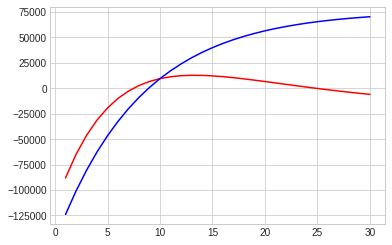

In [26]:
n = np.linspace(1, 30, 30)
print(n)
plt.plot(n, -116400 + 32000 * P_A(1, 0.13, n) - 2500 * P_G(1, 0.13, n), color='r')
plt.plot(n, -170000 + 32000 * P_A(1, 0.13, n) + 20000 * P_F(1, 0.13, n), color='b')